In [57]:
from viska.eval_rec import *

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
PROJECT_PATH = '../'
TRAIN_PATH = '/scratch/ceph/swei20/data/pfsspec/train/ae/dataset/bosz/nowave/norm_mr_100k'
TEST_PATH = '/scratch/ceph/swei20/data/pfsspec/train/ae/dataset/bosz/nowave/norm_mr_10k'

In [3]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import os
import sys
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Allow load project as module
sys.path.insert(0, PROJECT_PATH)

In [7]:
os.environ['PFSSPEC_DATA'] = r'/scratch/ceph/dobos/data/pfsspec'
os.environ['PYSYN_CDBS'] = os.path.join(os.environ['PFSSPEC_DATA'], 'cdbs')

In [8]:
# from pfsspec.data.dataset import Dataset
# from pfsspec.obsmod.spectrum import Spectrum

In [9]:
from viska.eval_rec import *

In [9]:
from viska.plot_svd import *

In [10]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [11]:
import tensorflow as tf
# tf.enable_v2_behavior()
gpus = tf.config.list_physical_devices('GPU') 
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load dataset and plot some examples

In [12]:
with h5py.File(TRAIN_PATH, 'r') as f:
    t_flux = f['flux'][()]
#     t_x = f['X'][()]

In [91]:
flux100k = prepro(t_flux, minmax=0)

mean [-0.05247305 -0.04448436 -0.05445554 ... -0.07425672 -0.07933415
 -0.02393444] | std [0.19647008 0.17660616 0.18771911 ... 0.08315135 0.07573074 0.03185162] | shape (4096,)
min -6.590830493700438 | max 0.6468175767427307
(100000, 4096)


In [93]:
flux100kmm = prepro(t_flux, minmax=1)

mean [-0.05247305 -0.04448436 -0.05445554 ... -0.07425672 -0.07933415
 -0.02393444] | std [0.19647008 0.17660616 0.18771911 ... 0.08315135 0.07573074 0.03185162] | shape (4096,)
min -6.590830493700438 | max 0.6468175767427307
min -0.6468175767427307 | max 6.590830493700438
mean 0.08936847584288846 | std 0.04605547687439891
(100000, 4096)


In [89]:
with h5py.File(TEST_PATH, 'r') as f:
    v_flux = f['flux'][()]

In [92]:
flux10k = prepro(v_flux, minmax=0)

mean [-0.05199292 -0.04410211 -0.0538733  ... -0.07279066 -0.07800463
 -0.02338591] | std [0.19236358 0.1727255  0.18381365 ... 0.08205565 0.07464719 0.03112414] | shape (4096,)
min -5.850646290128342 | max 0.6478198750932341
(10000, 4096)


In [94]:
flux10kmm = prepro(v_flux, minmax=1)

mean [-0.05199292 -0.04410211 -0.0538733  ... -0.07279066 -0.07800463
 -0.02338591] | std [0.19236358 0.1727255  0.18381365 ... 0.08205565 0.07464719 0.03112414] | shape (4096,)
min -5.850646290128342 | max 0.6478198750932341
min -0.6478198750932341 | max 5.850646290128342
mean 0.09968812003057397 | std 0.05129415539889446
(10000, 4096)


### AE

In [106]:
from viska.AE import AE

In [107]:
latent_dim = 32
hidden_units = [1024, 128]
# hidden_units = []
# reg1 = 1e-5
# reg1=None
encoder_dp=0.1
loss='mae'
lr=0.001

In [108]:
model= AE(latent_dim, hidden_units, reg1=reg1, encoder_dp=encoder_dp, loss=loss, lr=lr)
svs0, covs0 = analyze(model.ae)

[4096, 1024, 128, 32]
Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
encoder (Functional)         (None, 32)                4330656   
_________________________________________________________________
decoder (Functional)         (None, 4096)              4334720   
Total params: 8,665,376
Trainable params: 8,665,376
Non-trainable params: 0
_________________________________________________________________


In [109]:
model.encoder.summary()
model.decoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
sequential_118 (Sequential)  (None, 1024)              4195328   
_________________________________________________________________
sequential_119 (Sequential)  (None, 128)               131200    
_________________________________________________________________
sequential_120 (Sequential)  (None, 32)                4128      
Total params: 4,330,656
Trainable params: 4,330,656
Non-trainable params: 0
_________________________________________________________________
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 32)]              0         
________________________________

In [110]:
x_train = flux100k
model.fit(x_train, ep=100)

Epoch 1/100
5625/5625 [==============================] - 13s 2ms/step - loss: 0.0836 - val_loss: 0.0434
Epoch 2/100
5625/5625 [==============================] - 14s 2ms/step - loss: 0.0585 - val_loss: 0.0410
Epoch 3/100
5625/5625 [==============================] - 13s 2ms/step - loss: 0.0558 - val_loss: 0.0555
Epoch 4/100
5625/5625 [==============================] - 13s 2ms/step - loss: 0.0543 - val_loss: 0.0454
Epoch 5/100
5625/5625 [==============================] - 14s 2ms/step - loss: 0.0531 - val_loss: 0.0454
Epoch 6/100
5625/5625 [==============================] - 13s 2ms/step - loss: 0.0532 - val_loss: 0.0592
Epoch 7/100
5625/5625 [==============================] - 13s 2ms/step - loss: 0.0526 - val_loss: 0.0537
Epoch 8/100
5625/5625 [==============================] - 13s 2ms/step - loss: 0.0526 - val_loss: 0.0368
Epoch 9/100
5625/5625 [==============================] - 13s 2ms/step - loss: 0.0523 - val_loss: 0.0380
Epoch 10/100
5625/5625 [==============================] - 13s 2m

mse: 1.0830791559960693 | mae: 38.90275533166059 | 


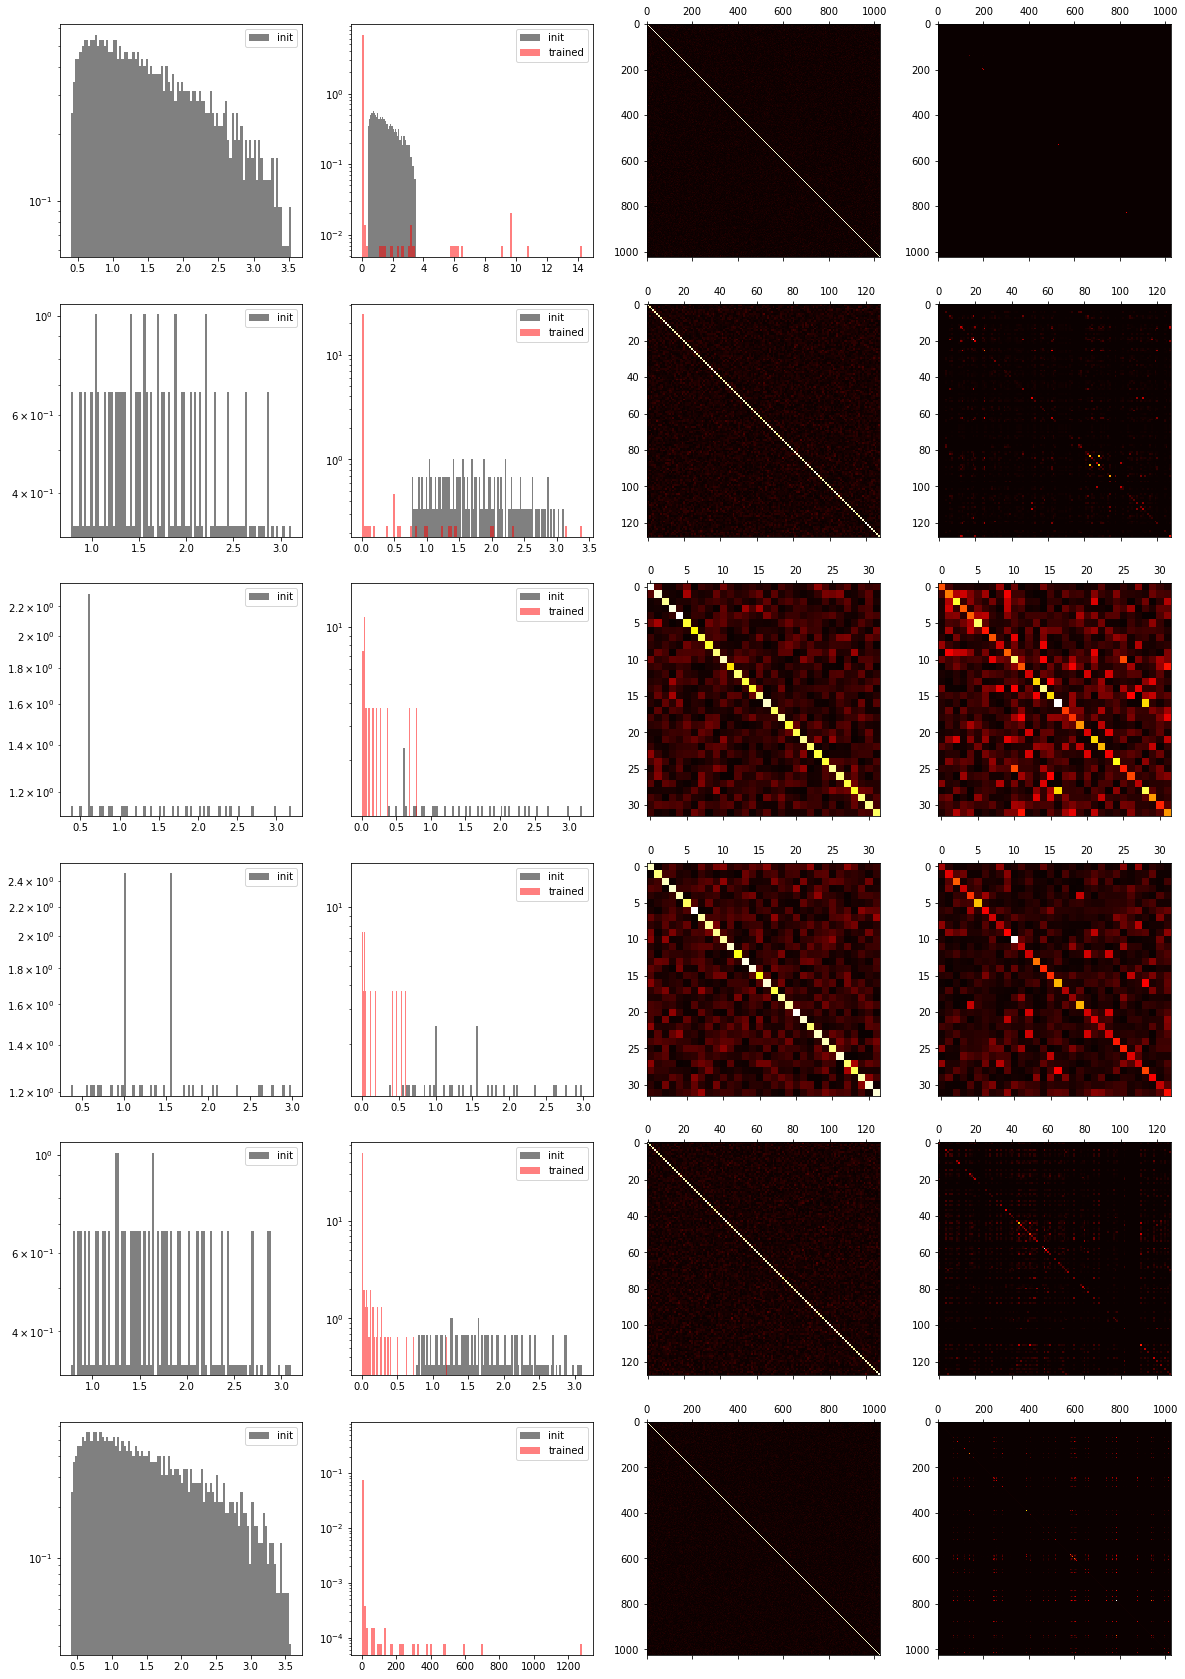

In [112]:
#ep20  lr=0.001 dp=0.1
# loss: 0.056 - val_loss: 0.0374
# 
x_test = flux10k
_,_,_ = get_ae_errs(x_test, model)
plot_ww0(svs0, covs0, model)

mse: 2.025395815102205 | mae: 71.57120915318728 | 


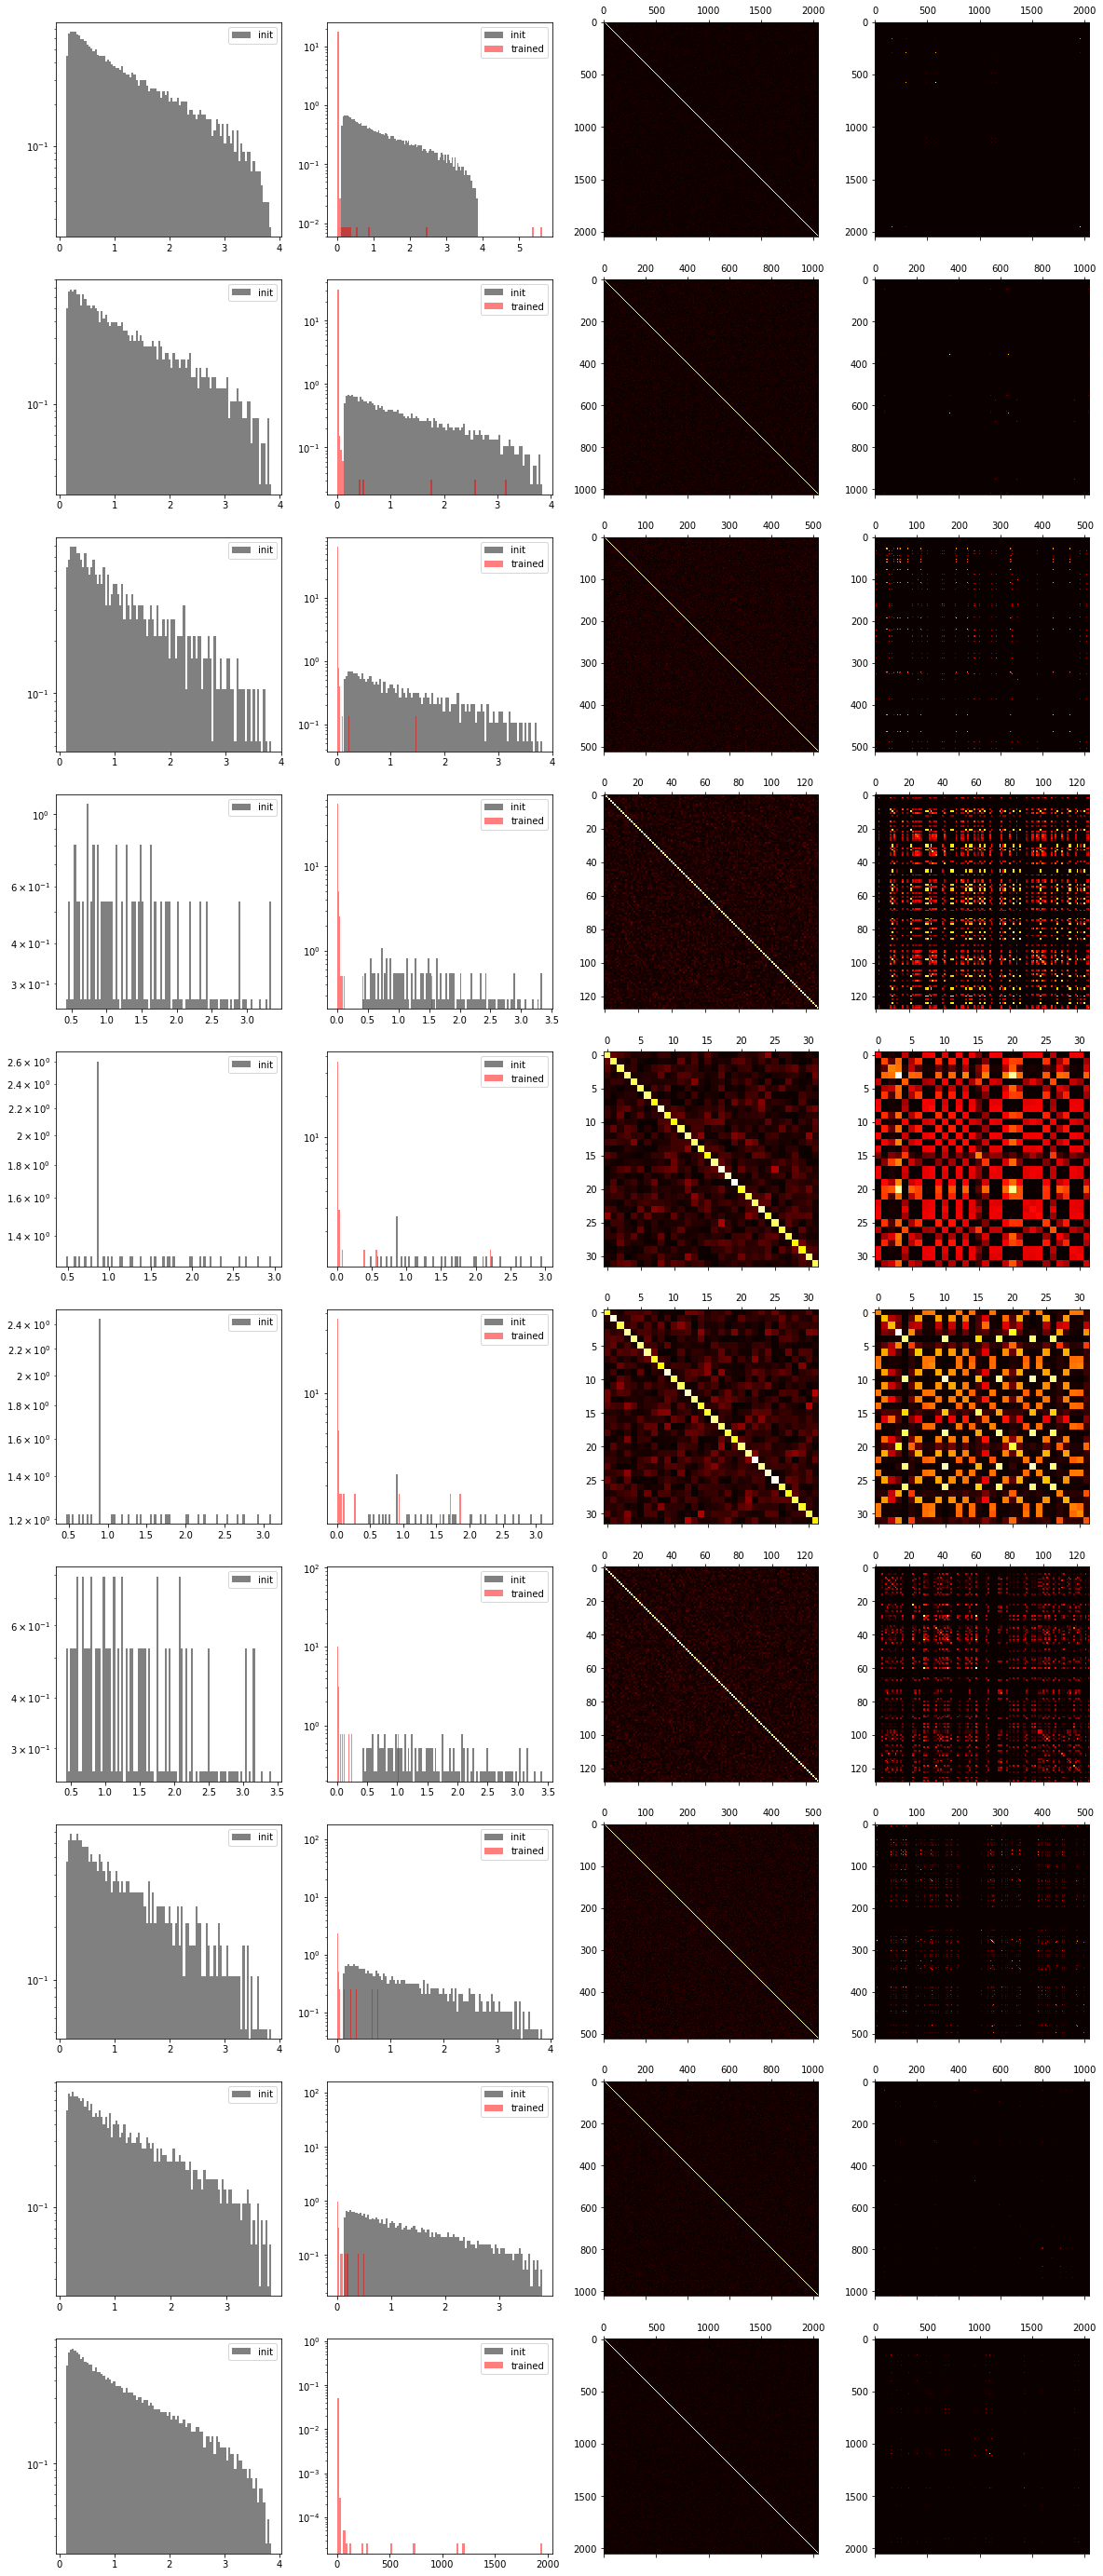

In [101]:
#ep20  lr=0.001 dp=0.2
# loss: 0.056 - val_loss: 0.0374
# 
x_test = flux10k
_,_,_ = get_ae_errs(x_test, model)
plot_ww0(svs0, covs0, model)

### AE

In [77]:
from viska.AE import AE

In [78]:
latent_dim = 32
hidden_units = [1024, 128]
# hidden_units = []
# reg1 = 1e-5
# reg1=None
encoder_dp=0.2
loss='mae'
lr=0.001

In [79]:
model= AE(latent_dim, hidden_units, reg1=reg1, encoder_dp=encoder_dp, loss=loss, lr=lr)
svs0, covs0 = analyze(model.ae)

[4096, 2048, 1024, 512, 128, 32]
Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
encoder (Functional)         (None, 32)                11083424  
_________________________________________________________________
decoder (Functional)         (None, 4096)              11087488  
Total params: 22,170,912
Trainable params: 22,170,912
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.encoder.summary()
model.decoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
sequential_86 (Sequential)   (None, 2048)              8390656   
_________________________________________________________________
sequential_87 (Sequential)   (None, 1024)              2098176   
_________________________________________________________________
sequential_88 (Sequential)   (None, 512)               524800    
_________________________________________________________________
sequential_89 (Sequential)   (None, 128)               65664     
_________________________________________________________________
sequential_90 (Sequential)   (None, 32)                4128      
Total params: 11,083,424
Trainable params: 11,083,424
Non-trainable params: 0
_______________________________________________

In [80]:
x_train = norm_flux
model.fit(x_train, ep=100)

Epoch 1/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0550 - val_loss: 0.0374
Epoch 2/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0376 - val_loss: 0.0376
Epoch 3/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0376 - val_loss: 0.0374
Epoch 4/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0375 - val_loss: 0.0376
Epoch 5/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0374 - val_loss: 0.0374
Epoch 6/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0374 - val_loss: 0.0377
Epoch 7/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0373 - val_loss: 0.0373
Epoch 8/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0372 - val_loss: 0.0372
Epoch 9/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0371 - val_loss: 0.0372
Epoch 10/100
5625/5625 [==============================] - 21s 4m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5625/5625 [==============================] - 22s 4ms/step - loss: 0.0335 - val_loss: 0.0335
Epoch 72/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0335 - val_loss: 0.0335
Epoch 73/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0334 - val_loss: 0.0336
Epoch 74/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0334 - val_loss: 0.0333
Epoch 75/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0334 - val_loss: 0.0335
Epoch 76/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0333 - val_loss: 0.0333
Epoch 77/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0333 - val_loss: 0.0332
Epoch 78/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0332 - val_loss: 0.0332
Epoch 79/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0332 - val_loss: 0.0331
Epoch 80/100
5625/5625 [==============================] - 21s 4ms/st

mse: 1.269585622142211 | mae: 60.151665912013044 | 


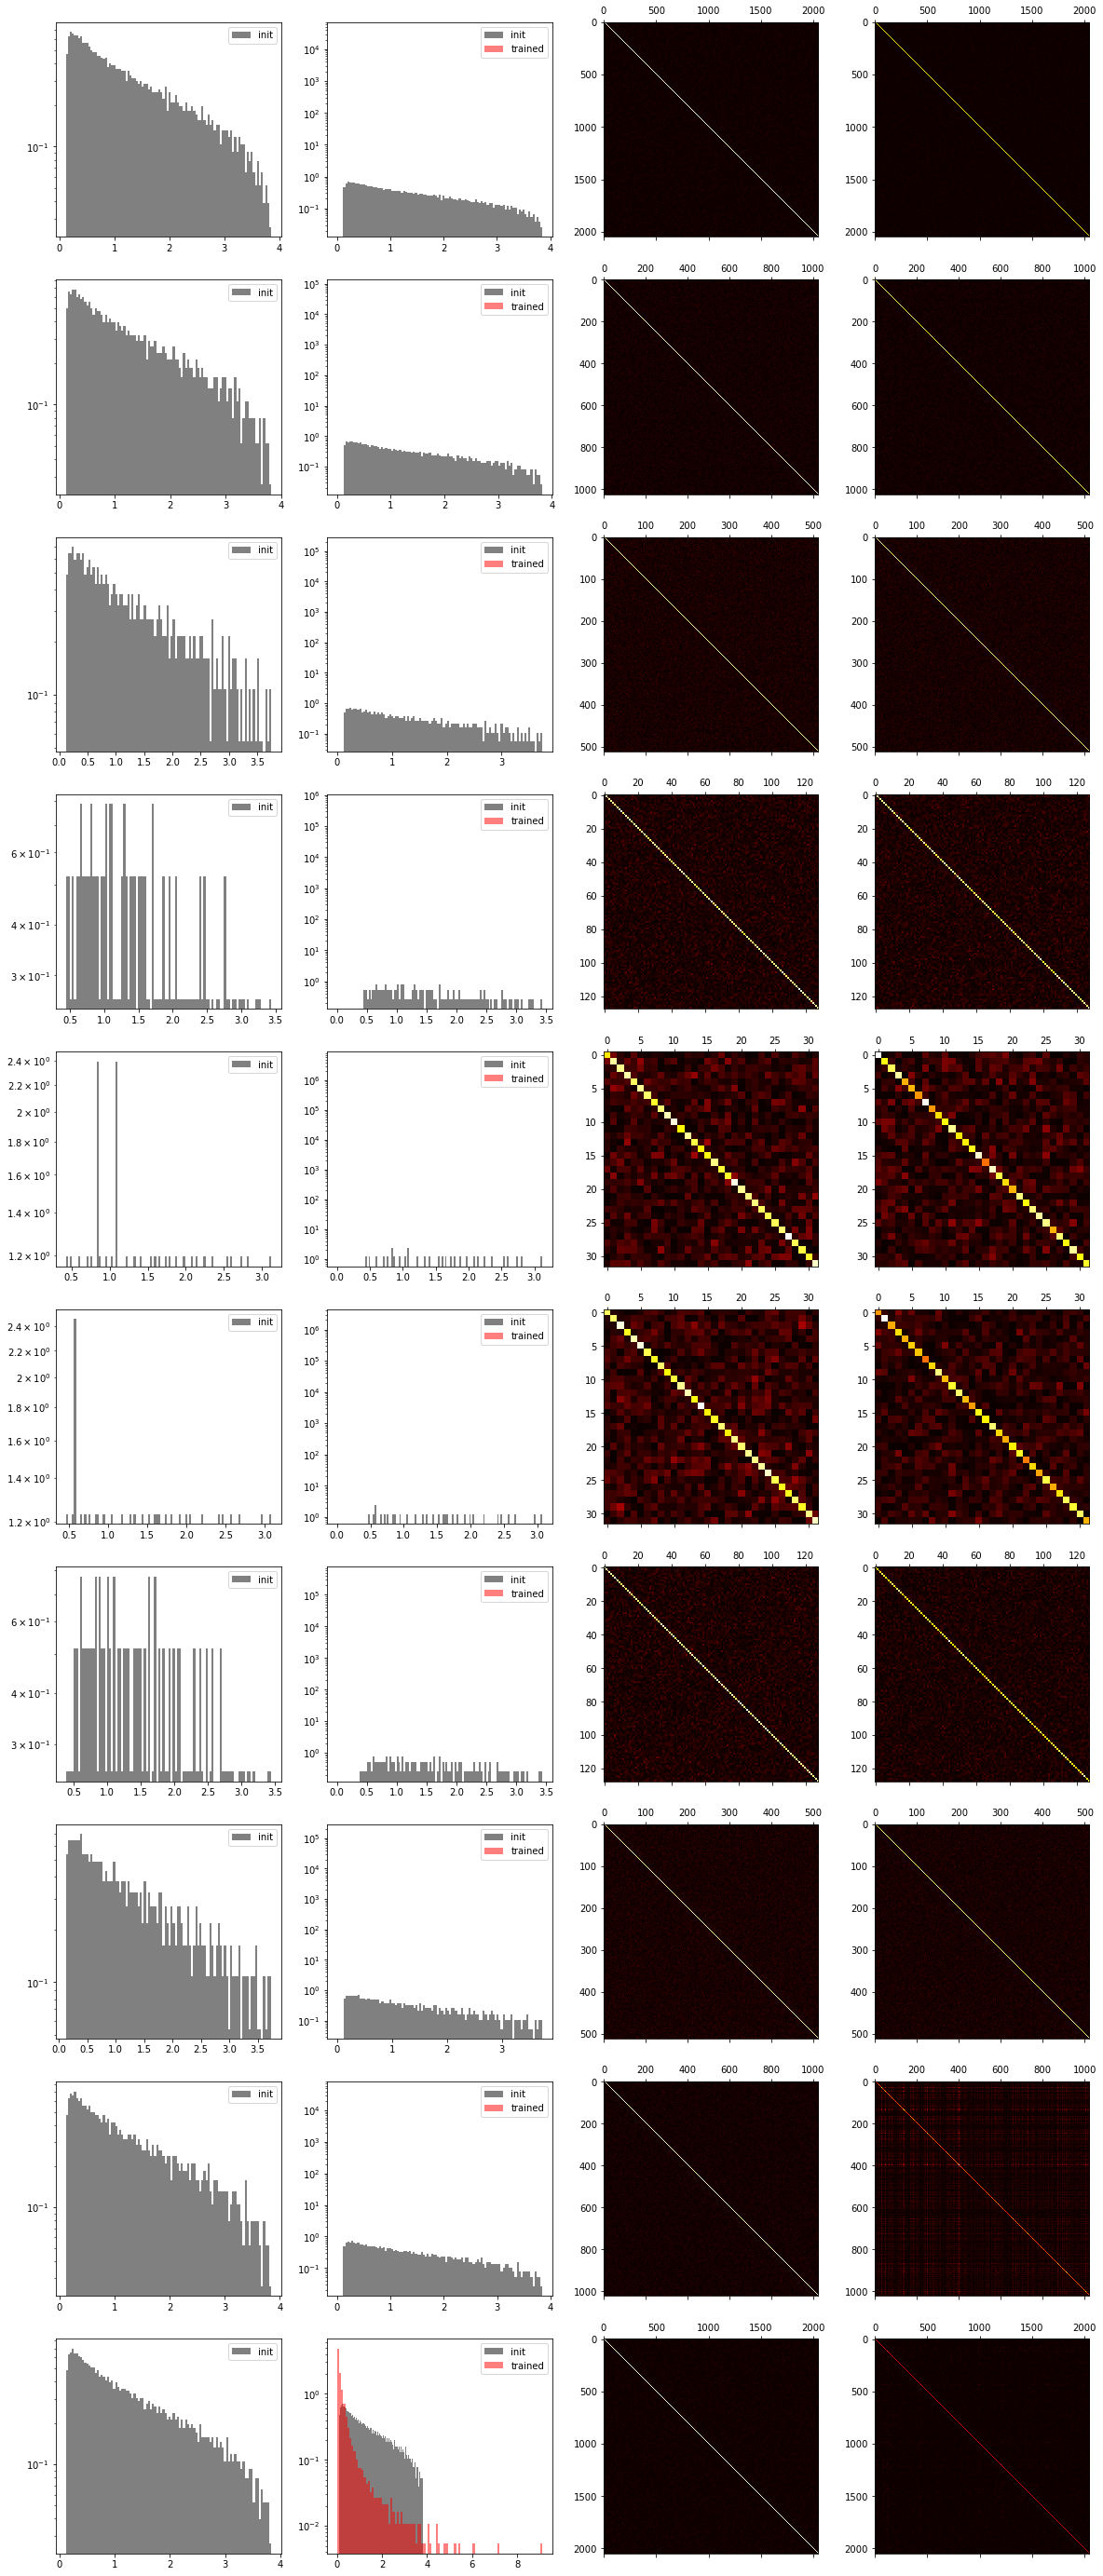

In [81]:
#ep20  lr=0.001
x_test = v_flux_norm
_,_,_ = get_ae_errs(x_test, model)
plot_ww0(svs0, covs0, model)

### AE

In [77]:
from viska.AE import AE

In [78]:
latent_dim = 32
hidden_units = [2048, 1024, 512, 128]
# hidden_units = []
# reg1 = 1e-5
# reg1=None
encoder_dp=0.2
loss='mae'
lr=0.001

In [79]:
model= AE(latent_dim, hidden_units, reg1=reg1, encoder_dp=encoder_dp, loss=loss, lr=lr)
svs0, covs0 = analyze(model.ae)

[4096, 2048, 1024, 512, 128, 32]
Model: "ae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
encoder (Functional)         (None, 32)                11083424  
_________________________________________________________________
decoder (Functional)         (None, 4096)              11087488  
Total params: 22,170,912
Trainable params: 22,170,912
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.encoder.summary()
model.decoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
spec (InputLayer)            [(None, 4096)]            0         
_________________________________________________________________
sequential_86 (Sequential)   (None, 2048)              8390656   
_________________________________________________________________
sequential_87 (Sequential)   (None, 1024)              2098176   
_________________________________________________________________
sequential_88 (Sequential)   (None, 512)               524800    
_________________________________________________________________
sequential_89 (Sequential)   (None, 128)               65664     
_________________________________________________________________
sequential_90 (Sequential)   (None, 32)                4128      
Total params: 11,083,424
Trainable params: 11,083,424
Non-trainable params: 0
_______________________________________________

In [80]:
x_train = norm_flux
model.fit(x_train, ep=100)

Epoch 1/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0550 - val_loss: 0.0374
Epoch 2/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0376 - val_loss: 0.0376
Epoch 3/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0376 - val_loss: 0.0374
Epoch 4/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0375 - val_loss: 0.0376
Epoch 5/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0374 - val_loss: 0.0374
Epoch 6/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0374 - val_loss: 0.0377
Epoch 7/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0373 - val_loss: 0.0373
Epoch 8/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0372 - val_loss: 0.0372
Epoch 9/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0371 - val_loss: 0.0372
Epoch 10/100
5625/5625 [==============================] - 21s 4m

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



5625/5625 [==============================] - 22s 4ms/step - loss: 0.0335 - val_loss: 0.0335
Epoch 72/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0335 - val_loss: 0.0335
Epoch 73/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0334 - val_loss: 0.0336
Epoch 74/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0334 - val_loss: 0.0333
Epoch 75/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0334 - val_loss: 0.0335
Epoch 76/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0333 - val_loss: 0.0333
Epoch 77/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0333 - val_loss: 0.0332
Epoch 78/100
5625/5625 [==============================] - 22s 4ms/step - loss: 0.0332 - val_loss: 0.0332
Epoch 79/100
5625/5625 [==============================] - 21s 4ms/step - loss: 0.0332 - val_loss: 0.0331
Epoch 80/100
5625/5625 [==============================] - 21s 4ms/st

mse: 1.269585622142211 | mae: 60.151665912013044 | 


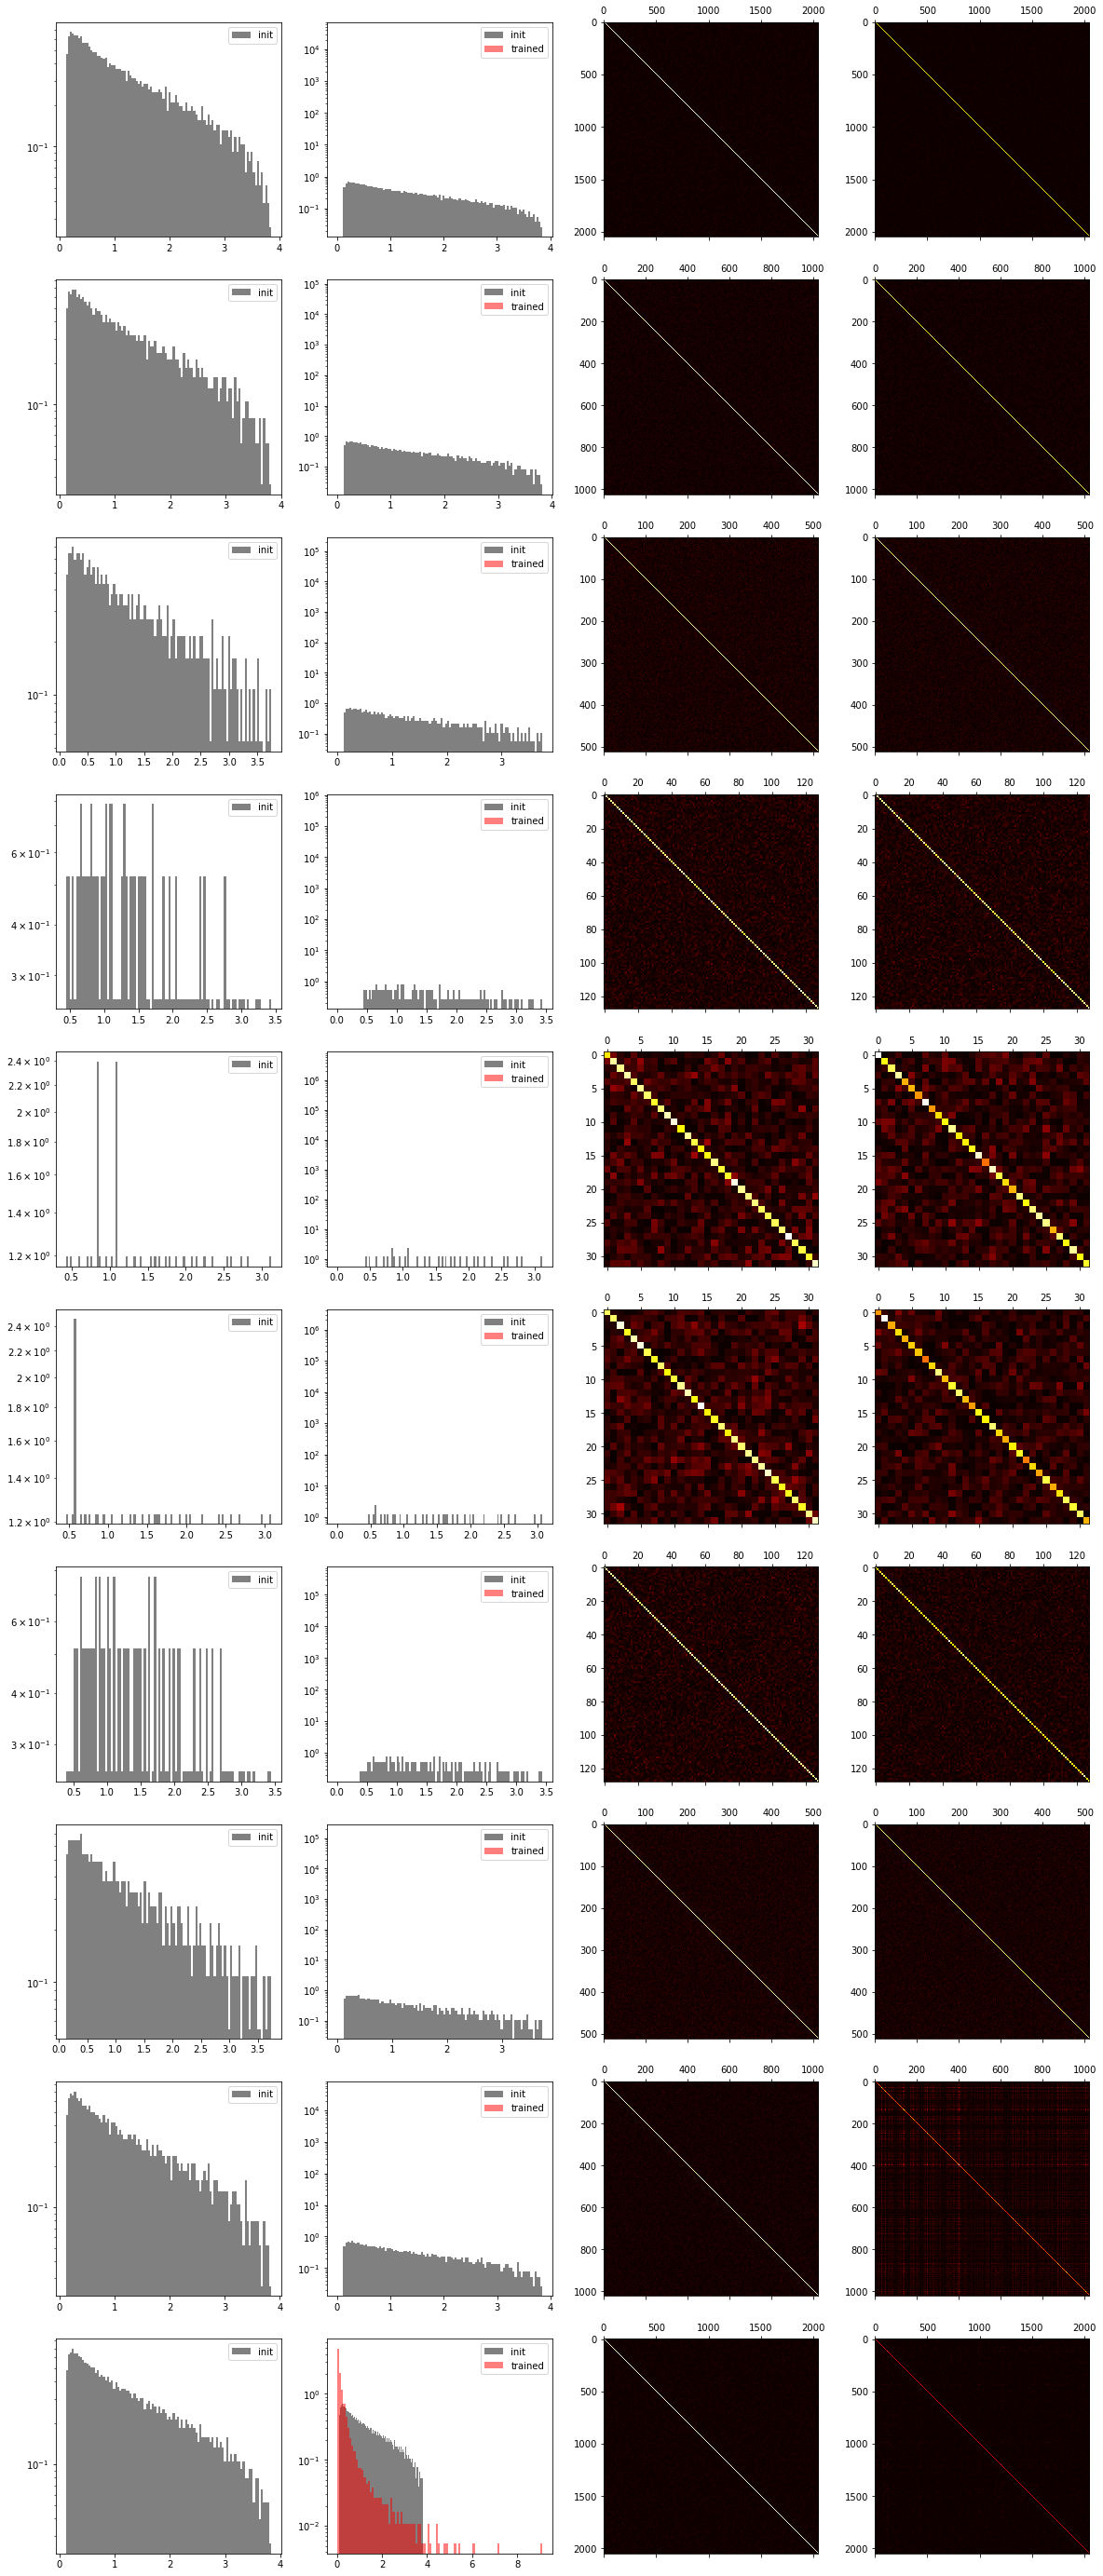

In [81]:
#ep20  lr=0.001
x_test = v_flux_norm
_,_,_ = get_ae_errs(x_test, model)
plot_ww0(svs0, covs0, model)

mse: 0.6163772174061368 | mae: 32.44299388461482 | 


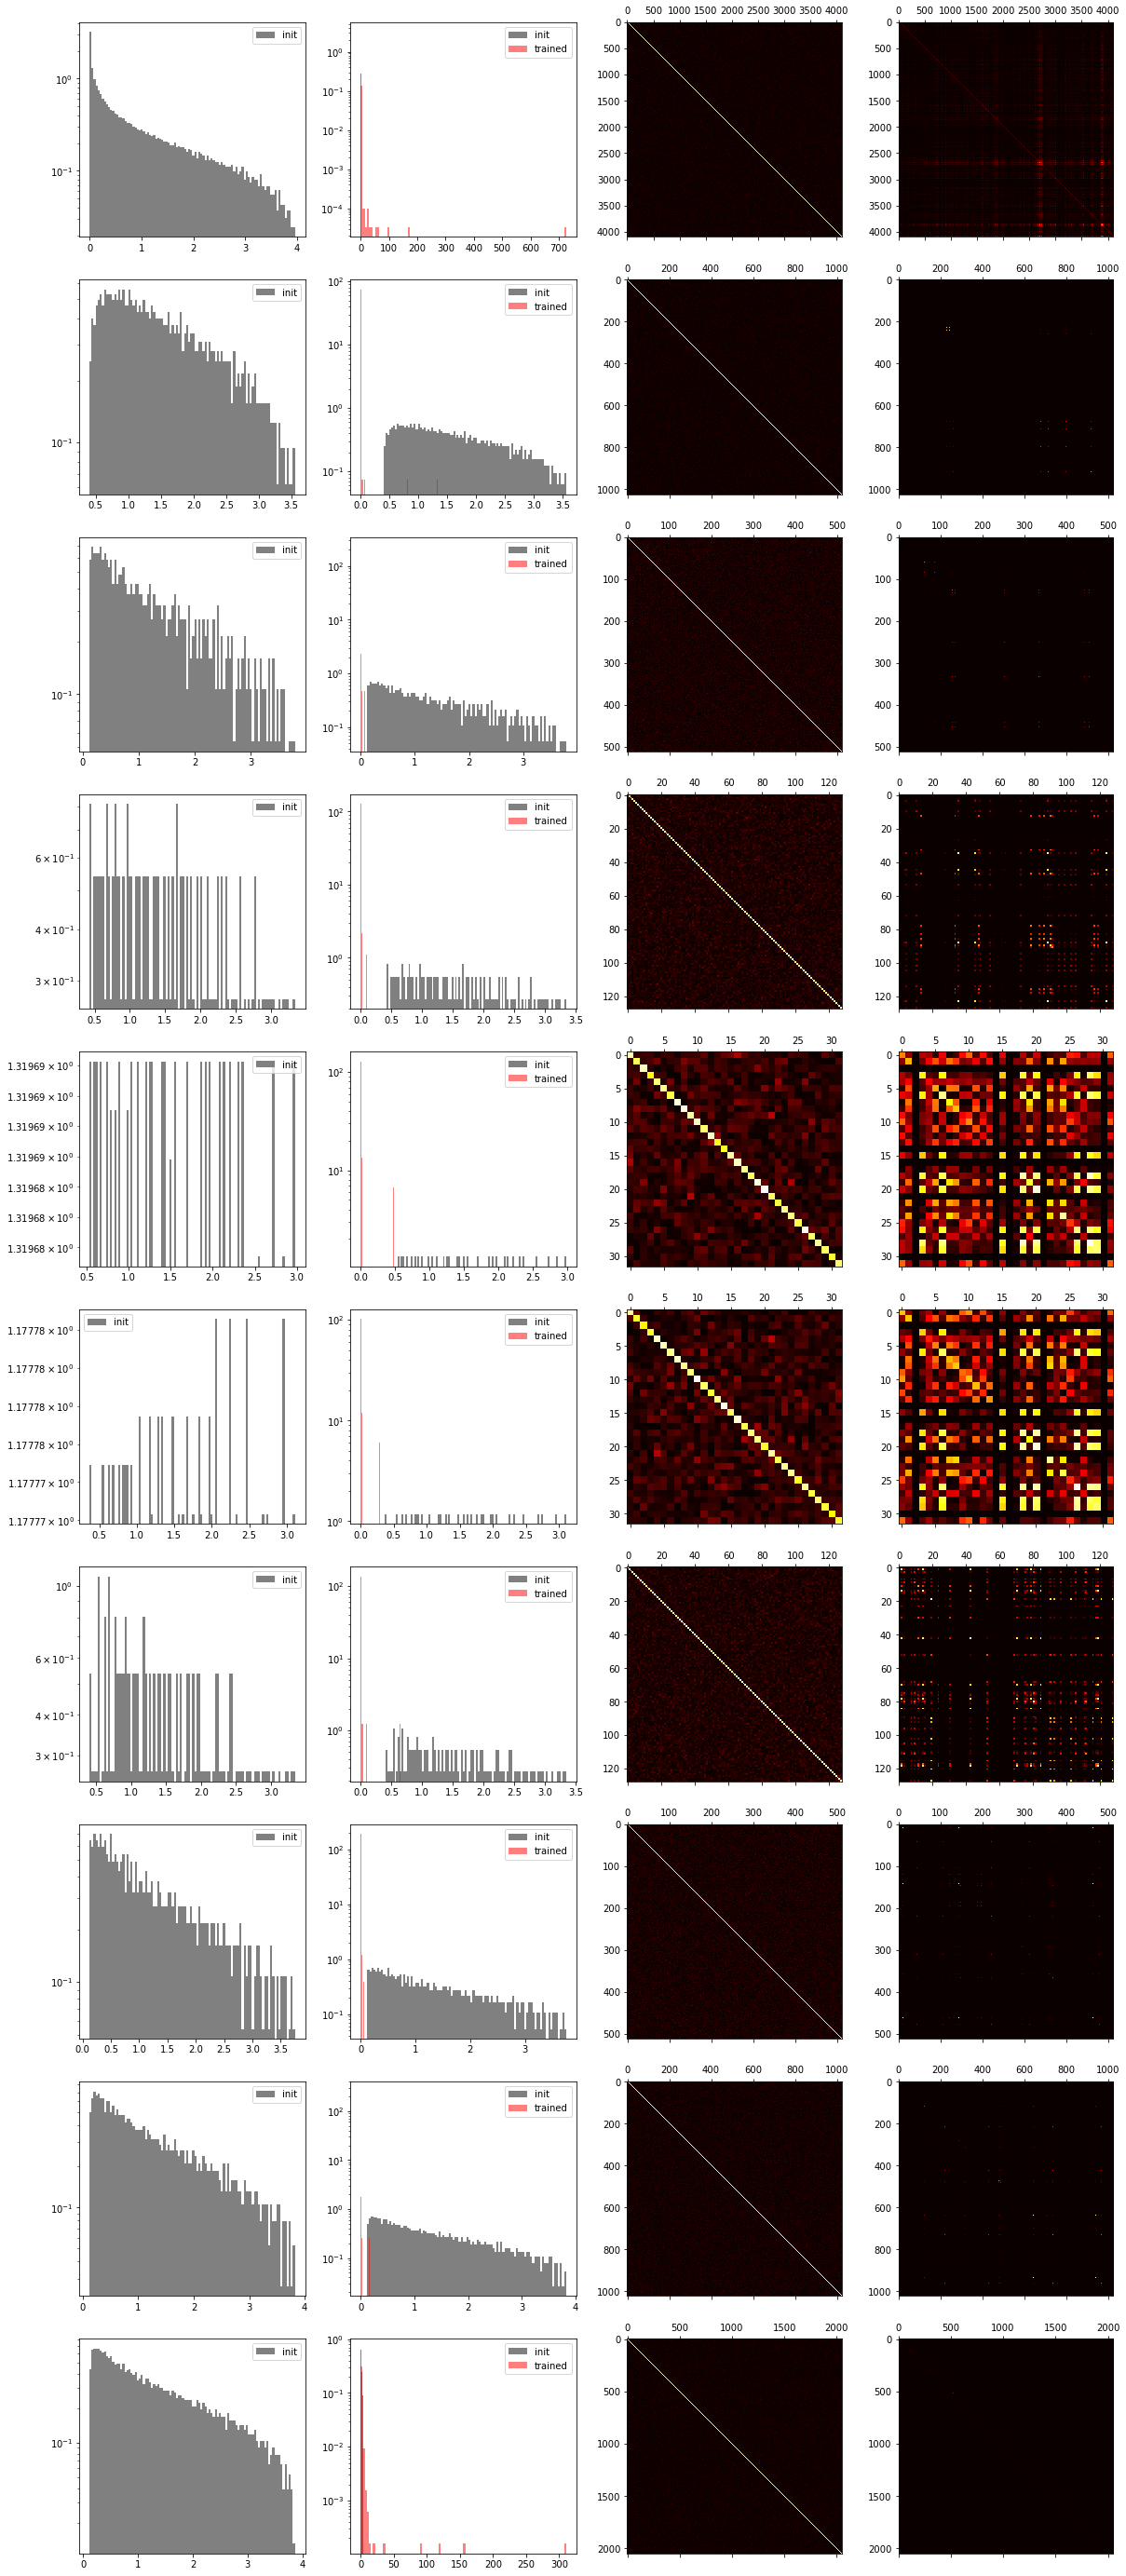

In [67]:
#ep20  lr=0.001
x_test = v_flux_norm
_,_,_ = get_ae_errs(x_test, model)
plot_ww0(svs0, covs0, model)

### PCA

In [97]:
with h5py.File(TRAIN_PATH, 'r') as f:
    u_train = f['U'][()]

In [100]:
with h5py.File(TEST_PATH, 'r') as f:
    pca_test = f['X'][()]

In [192]:
X, U_keep = pca_test, u_train[:, :latent_dim]
pca_pred = (X.dot(U_keep)).dot(U_keep.T)

In [193]:
err = np.sqrt(np.sum((pca_test - pca_pred)**2, axis = 1)).mean()
err

0.04892864180028026

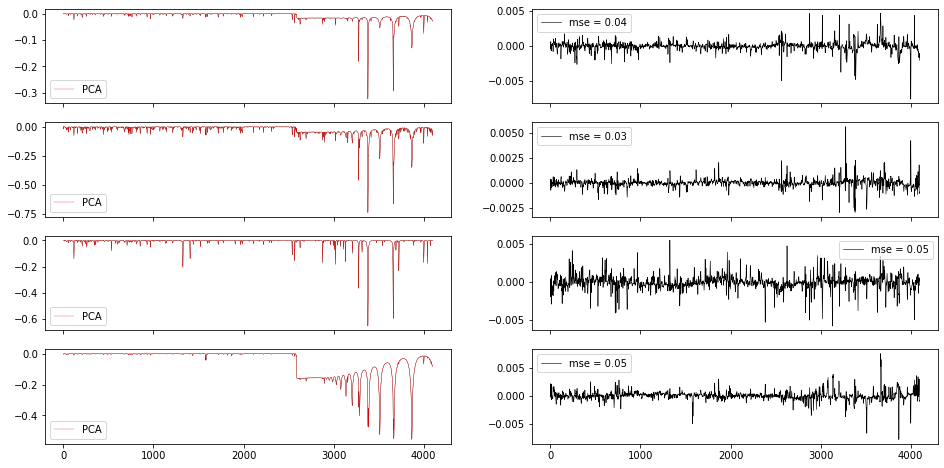

In [195]:
plot_pca_rec(pca_test, pca_pred, N=4)

### Latent Space

# Calculate principal components and expand on truncated basis

In [95]:
M = 50

PC = np.dot(X, U[:, 0:M])
PC.shape

(10000, 50)

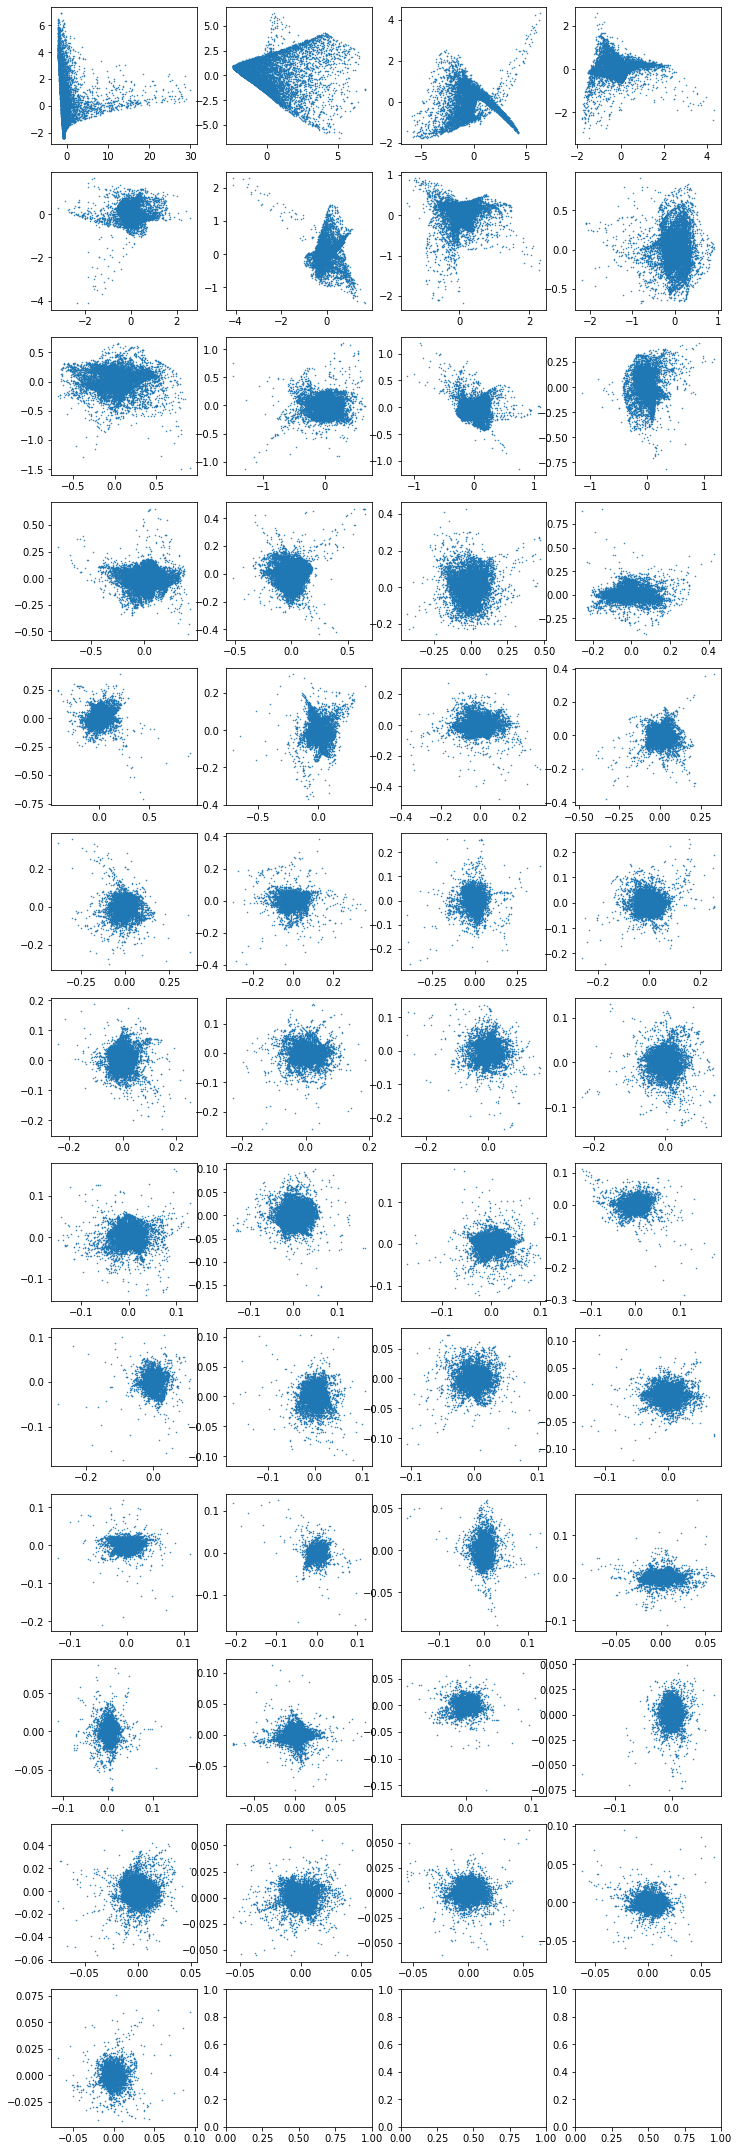

In [96]:
f, axs = plt.subplots(int(np.ceil(M / 4)), 4, figsize=(12, 3 * np.ceil(M / 4)))
axs = axs.flatten()

for i in range(M - 1):
    axs[i].plot(PC[:, i], PC[:, i + 1], '.', ms=1)

# Reconstruct from truncated basis

In [100]:
rflux = np.exp(avg + np.dot(PC, U[:, 0:M].transpose()))
rflux.shape

(10000, 4096)

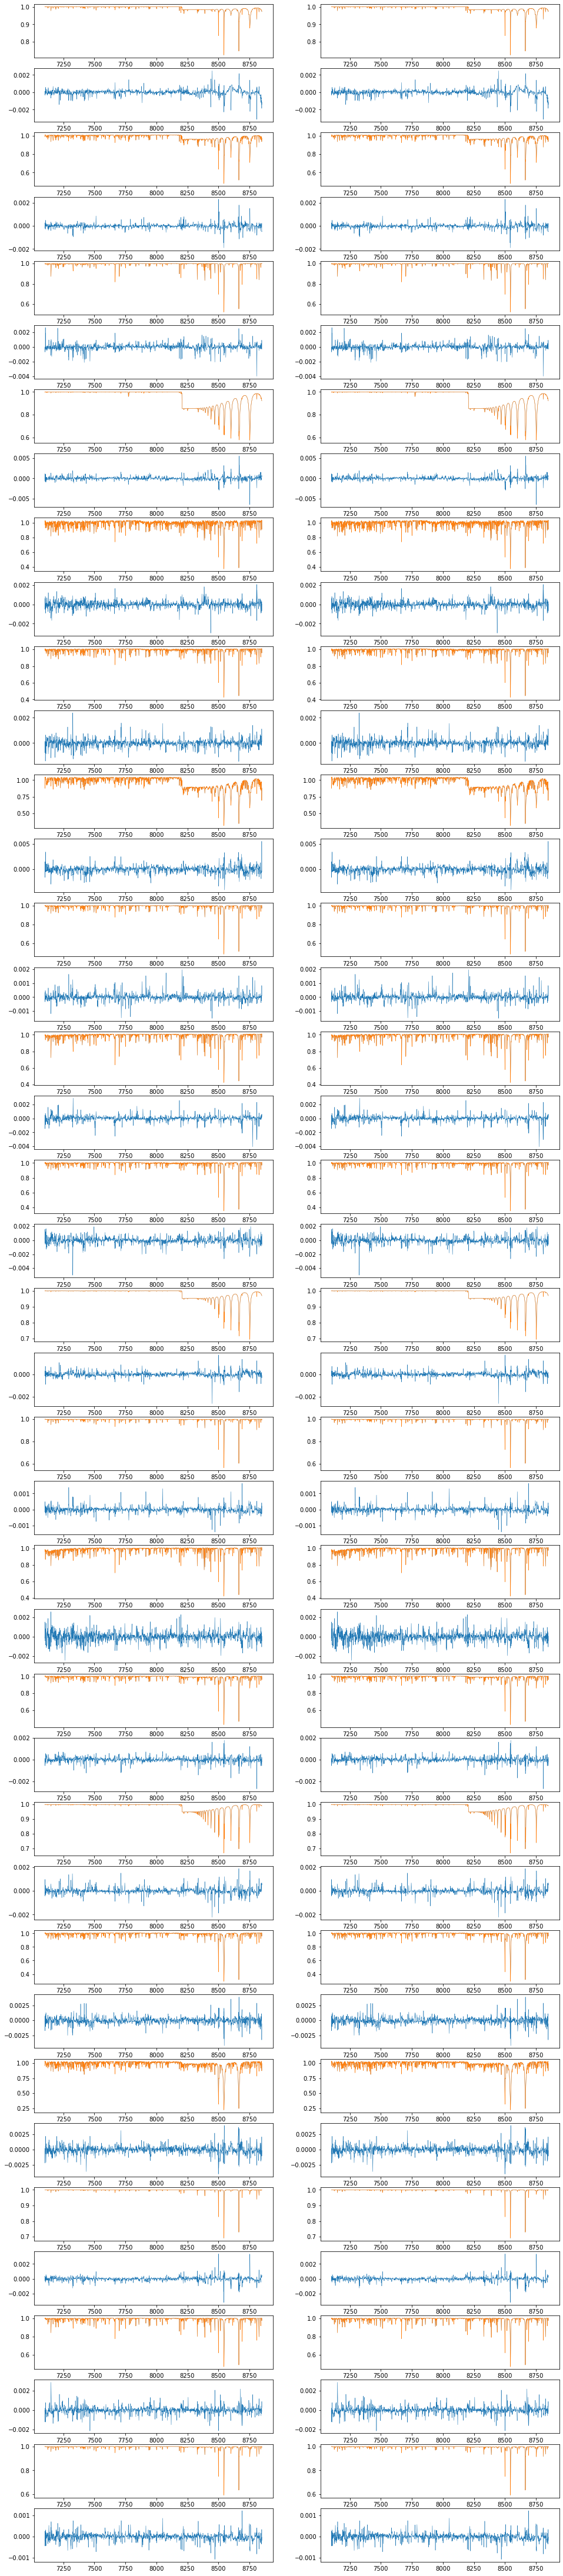

In [101]:
N = 20
f, axs = plt.subplots(2 * N, 2, figsize=(16, 4 * N), squeeze=False)

for i in range(N):
    axs[2 * i, 0].plot(wave, flux[i, :], lw=0.3)
    axs[2 * i, 0].plot(wave, rflux[i, :], lw=0.6)
    
    axs[2 * i, 1].plot(wave, flux[i, :], lw=0.3)
    axs[2 * i, 1].plot(wave, rflux[i, :], lw=0.6)
#     axs[2 * i, 1].set_xlim(8000, 9000)
    
    axs[2 * i + 1, 0].plot(wave, (flux[i, :] - rflux[i, :]) / flux[i, :], lw=0.5)
    
    axs[2 * i + 1, 1].plot(wave, (flux[i, :] - rflux[i, :]) / flux[i, :], lw=0.5)
#     axs[2 * i + 1, 1].set_xlim(8000, 9000)

In [ ]:
PC